I used the read_stata() function from *pandas* to load the data from a Stata file into a DataFrame.

In [1]:
# Importing necessary libraries
import pandas as pd
import os


In [2]:
file_path = "GSS2021.dta"

In [4]:

data = pd.read_stata(file_path)

In [5]:
# Display the first few rows of the dataset
print(data.head())

   year  id  hrs1 hrs2         wrkslf wrkgovt  \
0  2021   1  36.0  NaN   someone else     NaN   
1  2021   2  45.0  NaN   someone else     NaN   
2  2021   3  16.0  NaN   someone else     NaN   
3  2021   4  27.0  NaN  self-employed     NaN   
4  2021   6  42.0  NaN   someone else     NaN   

                                           occ10 prestg10 prestg105plus  \
0           receptionists and information clerks     38.0          29.0   
1            advertising and promotions managers     57.0          78.0   
2       miscellaneous assemblers and fabricators     35.0          26.0   
3                              childcare workers     35.0          28.0   
4  insurance claims and policy processing clerks     38.0          34.0   

                                     indus10  ... fileversion  \
0                        offices of dentists  ...      7222.4   
1           advertising and related services  ...      7222.4   
2      furniture and home furnishings stores  ...      7222

In [6]:
# Check the size of the dataset
print(f"Veri seti boyutu: {data.shape}")  # (satır sayısı, sütun sayısı)


Veri seti boyutu: (4032, 923)


In [7]:
# List the column names (variables) in the dataset
print(data.columns)

Index(['year', 'id', 'hrs1', 'hrs2', 'wrkslf', 'wrkgovt', 'occ10', 'prestg10',
       'prestg105plus', 'indus10',
       ...
       'fileversion', 'spwrkslf2', 'spwrkslffam', 'childsinhh', 'adultsinhh',
       'whatsp2', 'cowrkslf2', 'cowrkslffam', 'cowksup', 'whatco2'],
      dtype='object', length=923)


In [8]:
# Check the number of missing values in each variable
print(data.isnull().sum())


year              0
id                0
hrs1           1916
hrs2           3949
wrkslf          107
               ... 
whatsp2        2138
cowrkslf2      3992
cowrkslffam    3992
cowksup        3889
whatco2        3690
Length: 923, dtype: int64


In [12]:
# Display basic statistical information for the key variables.
key_variables = ['prestg10', 'childsinhh', 'hrs1', 'income', 'educ']
for var in key_variables:
    print(f"Descriptive statistics for {var}:")
    print(f"  Mean: {data[var].mean()}")
    print(f"  Median: {data[var].median()}")
    print(f"  Standard Deviation: {data[var].std()}")
    print(f"  Minimum: {data[var].min()}")
    print(f"  Maximum: {data[var].max()}")
    print("-" * 40)

Descriptive statistics for prestg10:


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [13]:
# Check data types of the selected key variables
print(data[key_variables].dtypes)


prestg10      category
childsinhh    category
hrs1          category
income        category
educ          category
dtype: object


Convert Categorical Variables to Numerical

In [14]:

data['prestg10_num'] = data['prestg10'].cat.codes
data['childsinhh_num'] = data['childsinhh'].cat.codes
data['hrs1_num'] = data['hrs1'].cat.codes
data['income_num'] = data['income'].cat.codes
data['educ_num'] = data['educ'].cat.codes


In [15]:
converted_variables = ['prestg10_num', 'childsinhh_num', 'hrs1_num', 'income_num', 'educ_num']

for var in converted_variables:
    print(f"Descriptive statistics for {var}:")
    print(f"  Mean: {data[var].mean()}")
    print(f"  Median: {data[var].median()}")
    print(f"  Standard Deviation: {data[var].std()}")
    print(f"  Minimum: {data[var].min()}")
    print(f"  Maximum: {data[var].max()}")
    print("-" * 40)

Descriptive statistics for prestg10_num:
  Mean: 28.323660714285715
  Median: 29.0
  Standard Deviation: 14.716409790916208
  Minimum: -1
  Maximum: 59
----------------------------------------
Descriptive statistics for childsinhh_num:
  Mean: 0.4489087301587302
  Median: 0.0
  Standard Deviation: 0.940485947538513
  Minimum: -1
  Maximum: 7
----------------------------------------
Descriptive statistics for hrs1_num:
  Mean: 19.899305555555557
  Median: 15.0
  Standard Deviation: 21.740429409611554
  Minimum: -1
  Maximum: 73
----------------------------------------
Descriptive statistics for income_num:
  Mean: 8.726686507936508
  Median: 11.0
  Standard Deviation: 4.291904436762967
  Minimum: -1
  Maximum: 11
----------------------------------------
Descriptive statistics for educ_num:
  Mean: 14.510912698412698
  Median: 15.0
  Standard Deviation: 3.4231659259962077
  Minimum: -1
  Maximum: 20
----------------------------------------


**Visualizations**

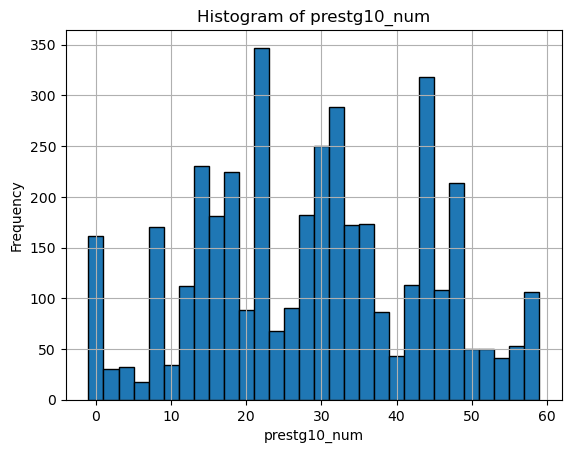

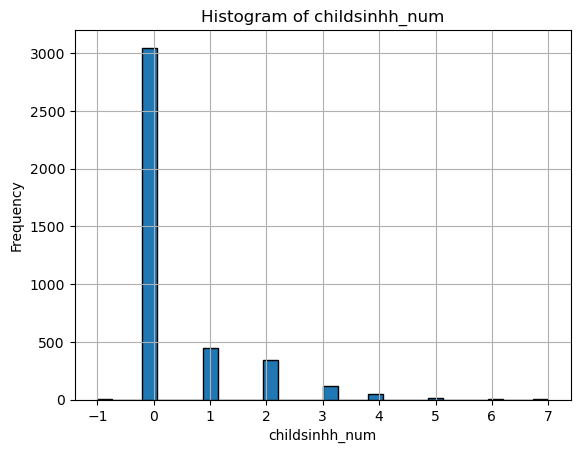

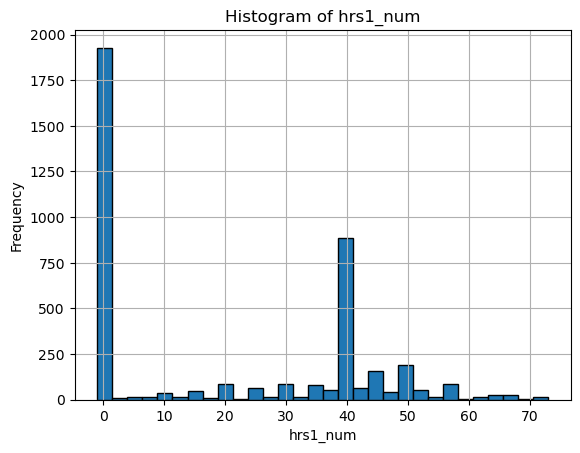

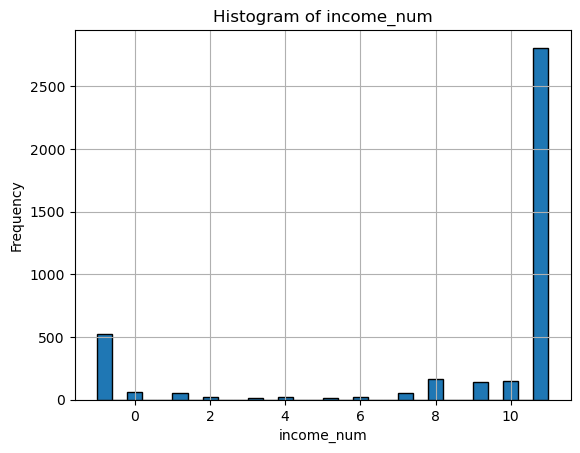

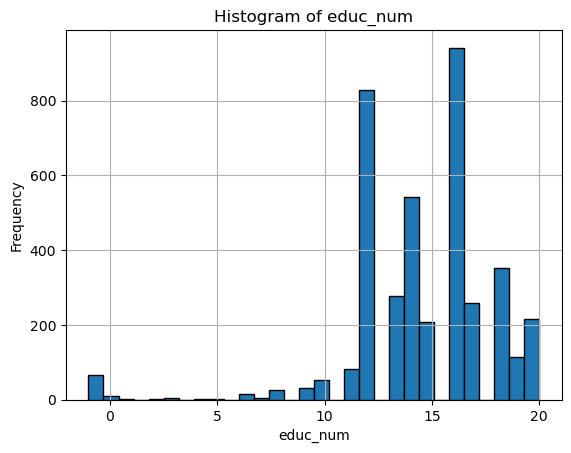

In [16]:

for var in converted_variables:
    data[var].dropna().hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


The average occupational prestige score is 28.32, and the median is 29. This shows most values are around 28-29. The high standard deviation (14.72) indicates large variability in scores.

The average number of children in households is 0.45, and the median is 0. This means most households have no children. The maximum number of children is 7. The value -1 should be treated as missing data. The standard deviation (0.94) shows low variability.

The average working hours are 19.9, but the median is 15. This suggests lower working hours affect the average. The high standard deviation (21.74) shows large differences in working hours.

The average income level is 8.73, but the median is 11. Some lower income values pull the average down. The maximum value (11) indicates a data limit.

The average years of education are 14.51, and the median is 15. Most people have education beyond high school. The maximum value of 20 represents highly educated individuals.

Then firstly, we need to define the hypothesis:

Null Hypothesis (H₀): There is no significant difference in income between full-time workers (hrs1_num > 35) and part-time workers (hrs1_num ≤ 35).

We use the scipy.stats library to perform the t-test.

We have to ensure 'income_num' and 'hrs1_num' have no missing values.


In [18]:
from scipy.stats import ttest_ind

In [25]:
cleaned_data = data[['hrs1_num', 'income_num']].dropna()

Group the data into full-time and part-time workers

In [26]:
full_time = cleaned_data[cleaned_data['hrs1_num'] > 35]['income_num']
part_time = cleaned_data[cleaned_data['hrs1_num'] <= 35]['income_num']

In [27]:
t_stat, p_value = ttest_ind(full_time, part_time, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 11.72103208749418
P-Value: 3.258839840736292e-31


A positive T-Statistic indicates that the mean income of full-time workers is higher than that of part-time workers.

The P-Value is extremely small (close to 0), much less than the standard significance level (0.05).

This means we reject the null hypothesis (H₀) and conclude that there is a statistically significant difference in income between full-time and part-time workers.

In [29]:
print(f"Full-time workers: {len(full_time)}")
print(f"Part-time workers: {len(part_time)}")


Full-time workers: 1625
Part-time workers: 2407


In [31]:
import numpy as np
from scipy.stats import norm

# Calculate statistics for full-time workers
mean_full_time = full_time.mean()
std_full_time = full_time.std()
n_full_time = len(full_time)
z = norm.ppf(0.975)  # Z-value for 95% confidence

# Confidence interval
ci_full_time = (
    mean_full_time - z * (std_full_time / np.sqrt(n_full_time)),
    mean_full_time + z * (std_full_time / np.sqrt(n_full_time))
)

print(f"Full-Time Workers' Mean: {mean_full_time}")
print(f"Full-Time Workers' 95% Confidence Interval: {ci_full_time}")
 

Full-Time Workers' Mean: 9.633230769230769
Full-Time Workers' 95% Confidence Interval: (9.458011785528806, 9.808449752932733)


In [32]:
# Calculate statistics for part-time workers
mean_part_time = part_time.mean()
std_part_time = part_time.std()
n_part_time = len(part_time)

# Confidence interval
ci_part_time = (
    mean_part_time - z * (std_part_time / np.sqrt(n_part_time)),
    mean_part_time + z * (std_part_time / np.sqrt(n_part_time))
)

print(f"Part-Time Workers' Mean: {mean_part_time}")
print(f"Part-Time Workers' 95% Confidence Interval: {ci_part_time}")


Part-Time Workers' Mean: 8.114665558786871
Part-Time Workers' 95% Confidence Interval: (7.930874241118745, 8.298456876454999)


**Full-time workers have a mean income of 9.63 with a 95% confidence interval of (9.46, 9.81), while part-time workers have a mean income of 8.11 with a 95% confidence interval of (7.93, 8.30). The lack of overlap between these intervals indicates a statistically significant difference in income between the two groups.**

To analyze the correlation between income (income_num) and education level (educ_num), I will calculate the Pearson correlation coefficient and visualize the relationship.

In [33]:
from scipy.stats import pearsonr

# Drop missing values for the selected variables
cleaned_data = data[['income_num', 'educ_num']].dropna()

# Calculate the Pearson correlation
correlation, p_value = pearsonr(cleaned_data['income_num'], cleaned_data['educ_num'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")


Pearson Correlation Coefficient: 0.30452712026325346
P-Value: 2.8003325564567844e-87



Correlation Coefficient:
- Closer to 1: Strong positive relationship.
- Closer to -1: Strong negative relationship.
- Around 0: Weak or no linear relationship.

p-value

- p-value < 0.05: Statistically significant relationship.
- p-value ≥ 0.05: No statistically significant relationship.

**Based on the p-value, the correlation is statistically significant, indicating strong evidence of a relationship between income and education level.**



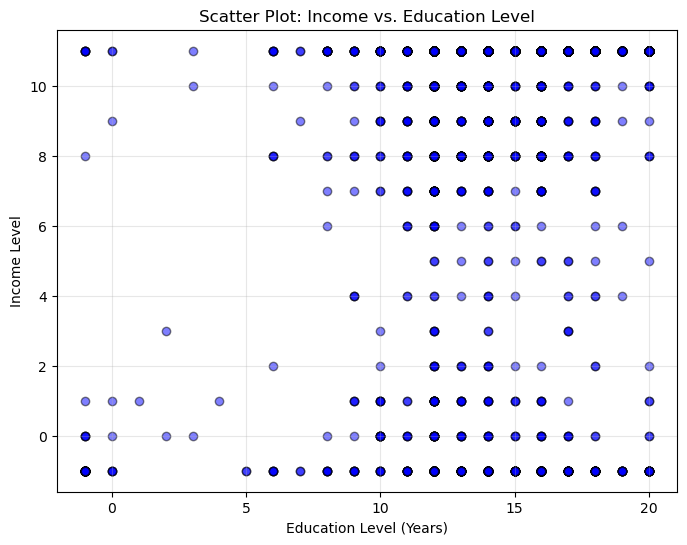

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_data['educ_num'], cleaned_data['income_num'], alpha=0.5, color='blue', edgecolor='black')
plt.title("Scatter Plot: Income vs. Education Level")
plt.xlabel("Education Level (Years)")
plt.ylabel("Income Level")
plt.grid(alpha=0.3)
plt.show()


Adding a regression line helps to visualize the general trend

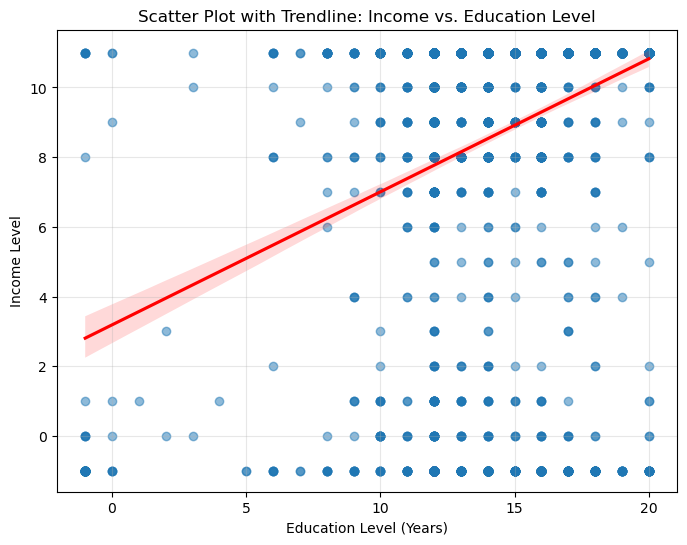

In [35]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='educ_num', y='income_num', data=cleaned_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Scatter Plot with Trendline: Income vs. Education Level")
plt.xlabel("Education Level (Years)")
plt.ylabel("Income Level")
plt.grid(alpha=0.3)
plt.show()


**The trendline indicates a positive correlation between education level and income. As education level increases, income tends to rise.**

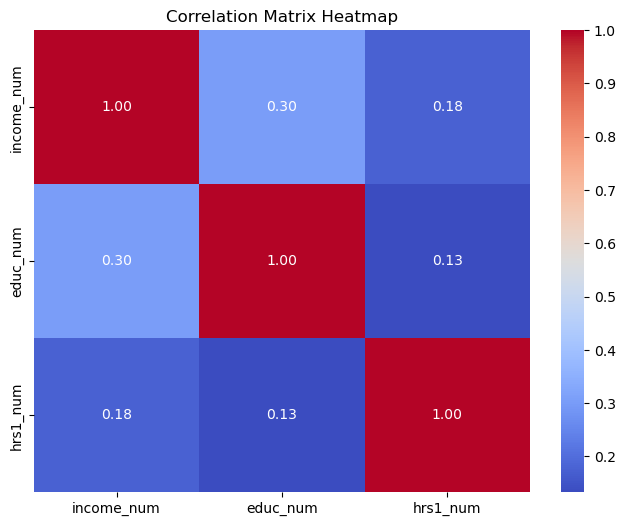

In [44]:
# Select variables of interest
selected_vars = ['income_num', 'educ_num', 'hrs1_num']

# Calculate correlation matrix
correlation_matrix = cleaned_data[selected_vars].corr()

# Display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


The relationships involving working hours (hrs1_num) are relatively weak, indicating limited direct association with income or education.

**To derive an OLS (Ordinary Least Squares) regression model, we will examine the relationship between income (income_num) as the dependent variable and two independent variables: education level (educ_num) and working hours (hrs1_num).**


In [48]:
import statsmodels.api as sm

# Drop missing values
cleaned_data = data[['income_num', 'educ_num', 'hrs1_num']].dropna()

# Define dependent and independent variables
X = cleaned_data[['educ_num', 'hrs1_num']]  # Independent variables
y = cleaned_data['income_num']             # Dependent variable

# Add a constant for the intercept
X = sm.add_constant(X)


In [49]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             income_num   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     252.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          4.25e-104
Time:                        01:36:52   Log-Likelihood:                -11356.
No. Observations:                4032   AIC:                         2.272e+04
Df Residuals:                    4029   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9777      0.279     10.691      0.0

Education Level: This effect is statistically significant (p < 0.001). Education has a bigger effect on income than working hours.

Working Hours: This effect is also statistically significant (p < 0.001). This effect is smaller but still significant.

R-squared: This means other factors also influence income.

Model Fit: The model explains 11.1% of the changes in income. This means most of the variation in income comes from other factors.

Overall, education has a stronger effect on income than working hours. Both predictors are significant.


To check the validity of the OLS model assumptions, we perform diagnostic tests for linearity, homoscedasticity, and normality of residuals.

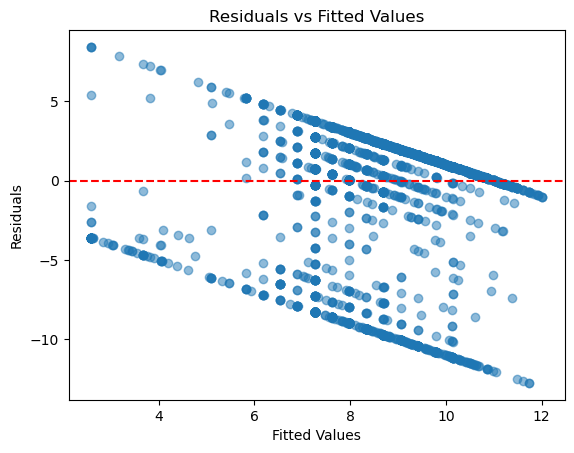

In [51]:
import matplotlib.pyplot as plt

# Residuals vs Fitted Values
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


The residuals show a cone-like shape as the fitted values get larger. This means the constant variance assumption is not met. The residuals' variance increases with higher fitted values, which suggests heteroscedasticity.

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 83.23957234525597, 'p-value': 8.409235736233172e-19, 'f-value': 42.46550824282619, 'f p-value': 5.61252743770893e-19}


p-value < 0.05: Heteroscedasticity exists (variance is not constant). The Breusch-Pagan test confirms heteroscedasticity in the model. 

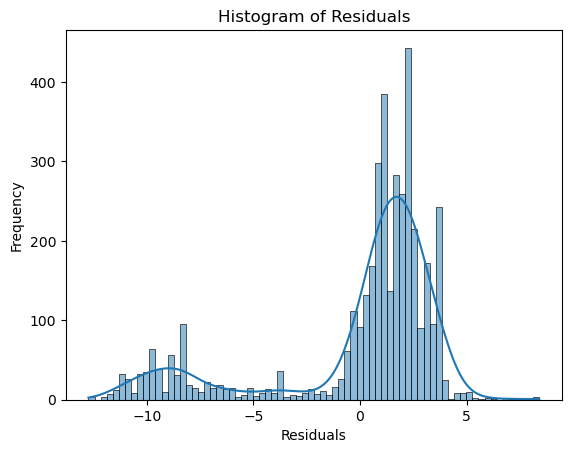

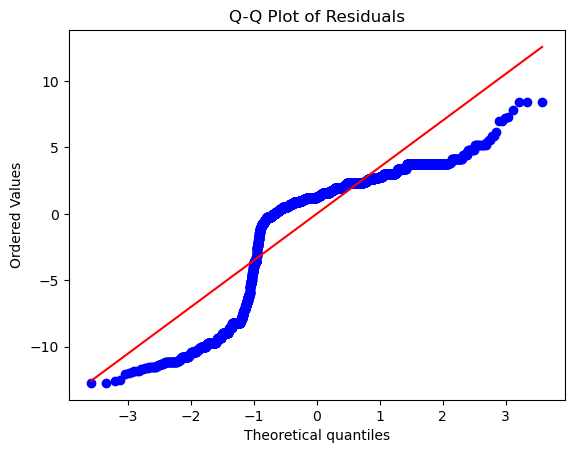

In [55]:
import seaborn as sns
import scipy.stats as stats

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


- The residuals do not have a perfect bell shape. They are skewed, mostly to the left. This means the residuals are not evenly spread. **(Histogram)**

- The points are far from the red line, especially at the ends. This shows the residuals are not normal. **(Q-Q Plot)**

Issue: The residuals are not normally distributed, and the homoscedasticity assumption is violated. 

As a first solution, we can transform the dependent variable using a logarithmic or square root transformation. This can help resolve the issue.

In [56]:
data['log_income'] = np.log(data['income_num'])


/Users/tugceunlu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tugceunlu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This error is caused by the fact that the dependent variable contains zero or negative values during logarithmic transformation.

In [57]:
print(data['income_num'].describe())  # Verinin genel istatistiklerini gösterir
print(data[data['income_num'] <= 0])  # Sıfır veya negatif değerleri listeler


count    4032.000000
mean        8.726687
std         4.291904
min        -1.000000
25%         9.000000
50%        11.000000
75%        11.000000
max        11.000000
Name: income_num, dtype: float64
      year    id  hrs1 hrs2         wrkslf wrkgovt  \
0     2021     1  36.0  NaN   someone else     NaN   
2     2021     3  16.0  NaN   someone else     NaN   
3     2021     4  27.0  NaN  self-employed     NaN   
4     2021     6  42.0  NaN   someone else     NaN   
5     2021     7  38.0  NaN   someone else     NaN   
...    ...   ...   ...  ...            ...     ...   
3968  2021  4396  50.0  NaN   someone else     NaN   
3994  2021  4430  21.0  NaN   someone else     NaN   
3996  2021  4433   NaN  NaN  self-employed     NaN   
4000  2021  4438   NaN  NaN   someone else     NaN   
4022  2021  4461   NaN  NaN   someone else     NaN   

                                                  occ10 prestg10  \
0                  receptionists and information clerks     38.0   
2             

In [58]:
data['log_income'] = np.log(data['income_num'] + 1)  # +1 sıfır değerleri pozitife çevirir


/Users/tugceunlu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
data = data[data['income_num'] > 0]  # Sadece pozitif değerleri tutar
data['log_income'] = np.log(data['income_num'])


In [65]:
data['log_income'] = np.log(data['income_num'])


In [66]:
X = data[['educ_num', 'hrs1_num']]  # Bağımsız değişkenler
y = data['log_income']              # Dönüştürülmüş bağımlı değişken

X = sm.add_constant(X)  # Sabit ekle
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     94.49
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.12e-40
Time:                        09:13:41   Log-Likelihood:                -1076.3
No. Observations:                3445   AIC:                             2159.
Df Residuals:                    3442   BIC:                             2177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9411      0.030     63.853      0.0

Each extra year of education increases income by 2.2%, on average.
This effect is statistically significant (p < 0.001). 

Each extra working hour increases income by 0.18%, on average.
This effect is also statistically significant (p < 0.001).



The second issue may be the variance is not constant (heteroscedasticity). The residuals change as fitted values increase.
The residuals are not normally distributed.

Instead of transforming the dependent variable or handling heteroscedasticity manually, we can use robust standard errors. This method adjusts for non-constant variance (heteroscedasticity) without requiring transformations.

**The robust method ensures that statistical inferences (e.g., significance) are still valid.**

In [68]:
#Fit the model using robust standard errors:
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     58.85
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           7.37e-26
Time:                        09:21:19   Log-Likelihood:                -1076.3
No. Observations:                3445   AIC:                             2159.
Df Residuals:                    3442   BIC:                             2177.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9411      0.049     39.359      0.0

**This project analyzes the relationship between income, education level, and working hours using an OLS regression model. The results show that both education and working hours have a positive and significant effect on income. Each additional year of education increases income by 2.2%, while each extra working hour increases income by 0.18%. However, the model explains only 5.2% of the variation in income, meaning other factors also influence income. The assumptions of normality and constant variance are violated, so a log transformation was applied to the income variable. Despite this, the residuals still show some issues, and more variables like job type or experience could improve the model.**